# Dropout in Neural Network
Dropout is a regularization technique which ameliorates overfitting by randomly disabling some neurons in the hidden layers. This is done by multiplying their output with 0 and thence the subsequent layer receives zero input from those particular neurons, thereby their effect is nullified. The output of active neurons of the hidden layers are divided by the (1-dropout ratio) or keep ratio so that the output of the next layer is not dumped due to disabling of neurons in the last layer. The weights of these disabled neurons are also not updated during back propagation. The random disabling changes every time a forward propagation is done. The dropout can also be applied to the input layer, however, it is advised to keep the dropout ratio very low, like 0.1. A typical ratio of dropout is 0.5 which means that 50% of the neurons will be disabled, but this also doesn't have to be same for all the layers. The layers with large number of neurons may have a dropout ratio of 0.5 and then the layers with small number of neurons may have a lower dropout ratio like 0.2 or 0.1.

In the testing phase, no dropout is applied!

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('datasets/HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df_cleaned = df.dropna()
df_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [5]:
X = df_cleaned.drop(columns=['MEDV'])
y = df_cleaned['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [6]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
468,15.57570,0.0,18.10,0.0,0.5800,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01
494,0.27957,0.0,9.69,0.0,0.5850,5.926,42.6,2.3817,6,391,19.2,396.90,13.59
16,1.05393,0.0,8.14,0.0,0.5380,5.935,29.3,4.4986,4,307,21.0,386.85,6.58


In [7]:
y_train.head()

15     19.9
468    19.1
282    46.0
494    24.5
16     23.1
Name: MEDV, dtype: float64

In [8]:
mm  = MinMaxScaler()
mm.fit(X_train)
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (315, 13)
X_test shape: (79, 13)


In [47]:
model = tf.keras.Sequential([
        tf.keras.Input(shape= (X_train.shape[1],) ),
        tf.keras.layers.Dense(units=30, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout with 50% rate
        tf.keras.layers.Dense(units=15, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='relu')
    ])
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.005))
model.fit(
    X_train,
    y_train,
    batch_size=500,
    epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 22.3156
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 22.1917
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 22.0647
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 21.8951
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 21.7443
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 21.6047
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 21.3325
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 21.1488
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 20.9827
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 20.5535
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 20.5989
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 20.2579
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 19.9554
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 19.4655
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 19.2081
Epoc

In [48]:
y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test)
# Compute the R^2 score
r2_2 = r2_score(y_test, y_pred)

print('R2 score:', r2_2)
print('Loss (Mean error per testing example):', loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9867 
R2 score: 0.6820713325487552
Loss (Mean error per testing example): 3.8097801208496094


#### Plotting Predicted vs Actual Value of Neural Network Regression Model

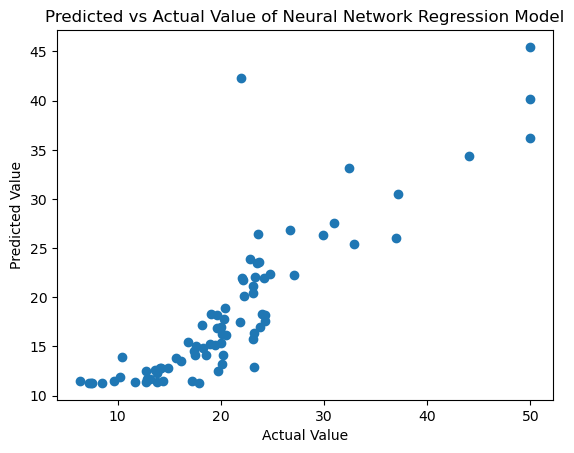

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Actual Value of Neural Network Regression Model')
plt.show()